In [1]:
import pandas as pd 
import numpy as np 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel(r"D:\ExceLR Solution\Assignments\Clustering\EastWestAirlines.xlsx",sheet_name='data')  

In [4]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
df.shape

(3999, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


# Data Preprocessing :

### Missing value Detection

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns 

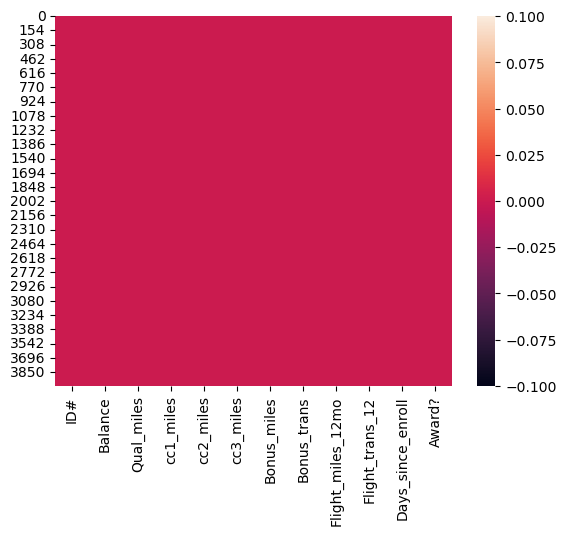

In [9]:
sns.heatmap(df.isnull())
plt.show()

In [10]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

### Outlier Detection

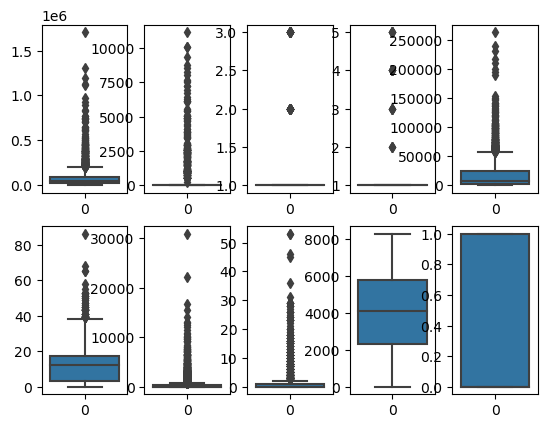

In [11]:
plt.subplot(2,5,1)
sns.boxplot(df['Balance'])
plt.subplot(2,5,2)
sns.boxplot(df['Qual_miles'])
plt.subplot(2,5,3)
sns.boxplot(df['cc2_miles'])
plt.subplot(2,5,4)
sns.boxplot(df['cc3_miles'])
plt.subplot(2,5,5)
sns.boxplot(df['Bonus_miles'])
plt.subplot(2,5,6)
sns.boxplot(df['Bonus_trans'])
plt.subplot(2,5,7)
sns.boxplot(df['Flight_miles_12mo'])
plt.subplot(2,5,8)
sns.boxplot(df['Flight_trans_12'])
plt.subplot(2,5,9)
sns.boxplot(df['Days_since_enroll'])
plt.subplot(2,5,10)
sns.boxplot(df['Award?'])
plt.show()


In [12]:
def outlier_remover(df,column):
    Q1,Q3 = np.quantile(df[column],[0.25,0.75])
    IQR = Q3 - Q1 
    upper_limit = Q3 + 1.5*IQR 
    lower_limit = Q1 - 1.5*IQR 
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column]) 
    return df 

In [13]:
for i in list(df.columns):
    df = outlier_remover(df,i) 

### Feature Scaling 

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 

In [15]:
scaler_pip = Pipeline([('Scaler',StandardScaler())]) 

In [16]:
df_scale =scaler_pip.fit_transform(df)

### PCA 

In [17]:
from sklearn.decomposition import PCA 

In [18]:
pca = PCA(n_components=2)

In [19]:
df_2D = pca.fit_transform(df_scale)

In [20]:
df_2D[:,0]

array([-1.06822668, -1.08112902, -0.76358218, ..., -0.35584903,
       -1.761454  , -2.89891659])

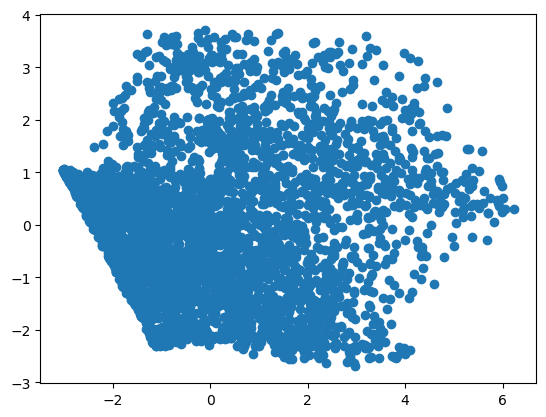

In [21]:
plt.scatter(df_2D[:,0],df_2D[:,1])
plt.show()

### Model Buliding :

In [22]:
from sklearn.cluster import DBSCAN,KMeans,AgglomerativeClustering 
from sklearn.metrics import silhouette_score 

#### K-Means Model 

In [23]:
sse = [] #SUM OF SQUARED ERROR
for k in range(1,40): 
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(df_scale)
    sse.append(km.inertia_)

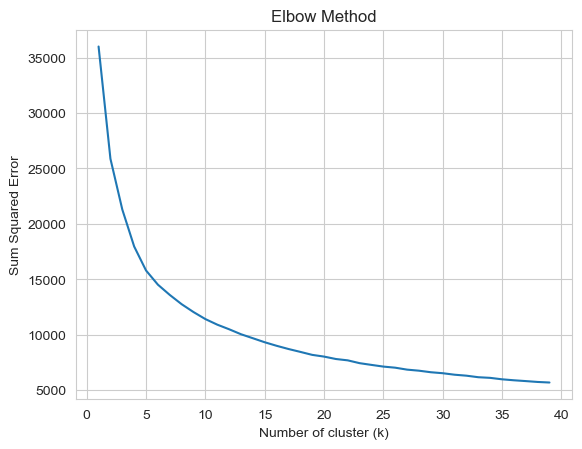

In [24]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,40), y=sse)
 
g.set(xlabel ="Number of cluster (k)", 
      ylabel = "Sum Squared Error", 
      title ='Elbow Method')
 
plt.show()

In [25]:
kn = KMeans(n_clusters=15) 

In [26]:
labels = kn.fit_predict(df_scale)

In [27]:
silhouette_score(df_scale,labels)

0.23617606412426764

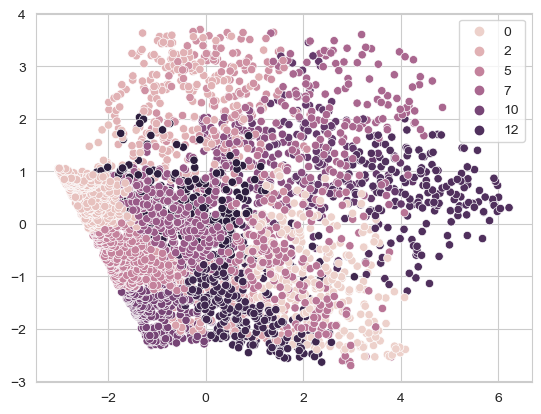

In [28]:
sns.scatterplot(data=df_2D,x=df_2D[:,0],y=df_2D[:,1],hue=labels)
plt.show() 

#### DB-SCAN Model 

In [29]:
dbscan_model = DBSCAN()

In [30]:
lables = dbscan_model.fit_predict(df)

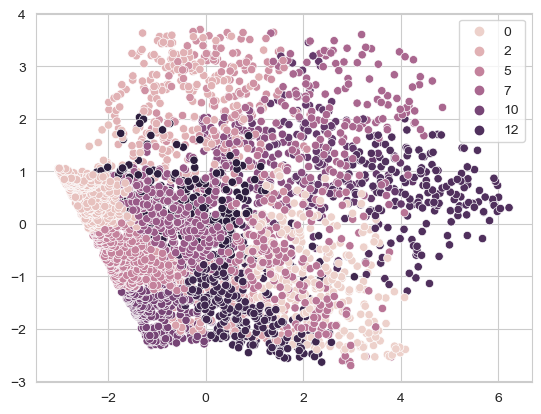

In [31]:
sns.scatterplot(data=df_2D,x=df_2D[:,0],y=df_2D[:,1],hue=labels)
plt.show()

#### Agglomerative Clustering Model 

In [32]:
Agglomerative_Clustering_model = AgglomerativeClustering() 

In [36]:
labels = Agglomerative_Clustering_model.fit_predict(df_scale)

In [37]:
Agglomerative_Clustering_model_score = silhouette_score(df_scale,labels)

In [38]:
print("Agglomerative_Clustering_model_score :",Agglomerative_Clustering_model_score)

Agglomerative_Clustering_model_score : 0.24792926845984306
